In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


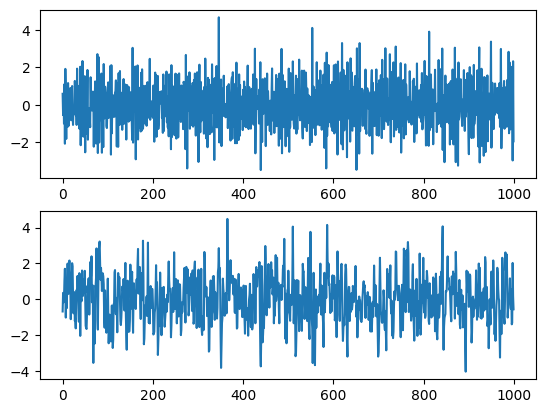

"\nThe two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.\n"

In [2]:
# exercise 01

"""
Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different parameter,
, using the arima_process module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive and a large negative 'theta'.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with
, the array representing the MA parameters would be ma = np.array([1, -0.9])
"""

# Instructions

"""
Import the class ArmaProcess in the arima_process module.
Plot the simulated MA(1) processes

    Let ma1 represent an array of the MA parameters [1, 'theta'] as explained above. The AR parameter array will contain just the lag-zero coefficient of one.
    With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called MA_object1.
    Simulate 1000 data points from the object you just created, MA_object1, using the method .generate_sample(). Plot the simulated data in a subplot.

Repeat for the other MA parameter.
"""

# solution

import matplotlib.pyplot as plt
import numpy as np
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

#----------------------------------#

# Conclusion

"""
The two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.
"""

In [7]:
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)

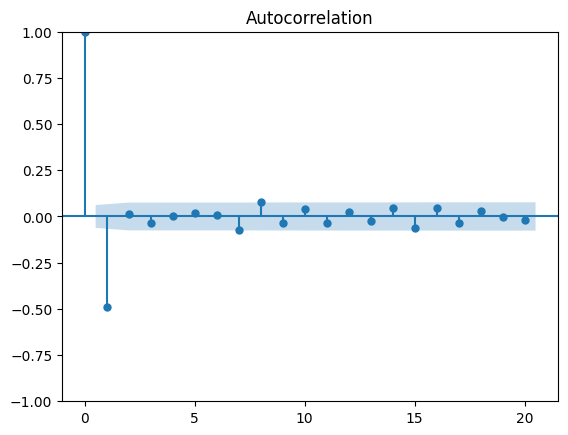

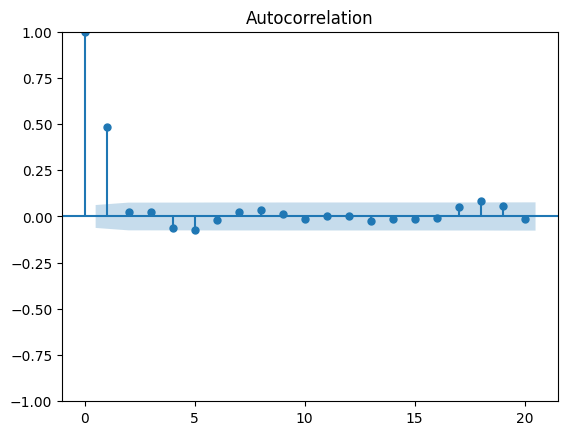

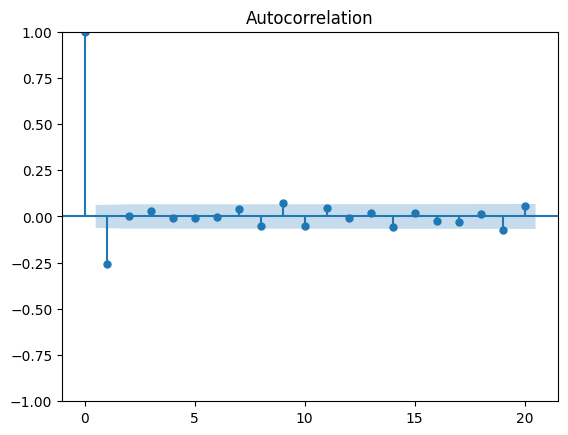

'\nWell Done! The ACF plots match what we predicted.\n'

In [8]:
# exercise 02

"""
Compute the ACF for Several MA Time Series

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not 'theta', but rather 'theta'/(1+'theta'²). For example, if the MA parameter, 'theta', is = +0.9, the first-lag autocorrelation will be
0.9/(1+(0.9)²)=0.497, and the autocorrelation at all other lags will be zero. If the MA parameter,'theta' , is -0.9, the first-lag autocorrelation will be -0.9/(1+(-0.9)²)=-0.497.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.
"""

# Instructions

"""
simulated_data_1 is the first simulated time series with an MA parameter of 'theta' =-0.9.
Compute the autocorrelation function of simulated_data_1 using the plot_acf function with 20 lags.
---
simulated_data_2 is the second simulated time series with an MA parameter of 'theta' = 0.9.
Compute the autocorrelation function using the plot_acf function with lags=20.
---
simulated_data_3 is the third simulated time series with an MA parameter of 'theta' = -0.3.
Compute the autocorrelation function using the plot_acf() function with 20 lags.
"""

# solution

# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

#----------------------------------#

# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

#----------------------------------#

# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

#----------------------------------#

# Conclusion

"""
Well Done! The ACF plots match what we predicted.
"""

# Match ACF with MA Model

Here are four Autocorrelation plots:

![image](/home/nero/Documents/Estudos/DataCamp/Python/courses/time-series-analysis-in-python/MultChoice_Ch4.png)

Which figure corresponds to an MA(1) model with an MA parameter of -0.5

### Possible Answers


    A
    
    
    B
    
    
    C
    
    
    D{Answer}

-0.5/(1+(-0.5)**2) = -0.4

In [12]:
# exercise 03

"""
Estimating an MA Model

You will estimate the MA(1) parameter,'theta', of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true 'theta' of -0.9, you will print out the estimate of . In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.
"""

# Instructions

"""


    Import the class ARIMA in the module statsmodels.tsa.arima.model.

    Create an instance of the ARIMA class called mod using the simulated data simulated_data_1 and the order (p,d,q) of the model (in this case, for an MA(1)), is order=(0,0,1).

    Fit the model mod using the method .fit() and save it in a results object called res.

    Print out the entire summary of results using the .summary() method.

    Just print out an estimate of the theta parameter using the .params[1] attribute.


"""

# solution

# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

#----------------------------------#

# Conclusion

"""
Notice how close the estimated parameter is to the true parameter.
"""

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1383.821
Date:                Thu, 14 Mar 2024   AIC                           2773.643
Time:                        08:16:54   BIC                           2788.366
Sample:                             0   HQIC                          2779.239
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.003      2.500      0.012       0.001       0.012
ma.L1         -0.9121      0.013    -70.820      0.000      -0.937      -0.887
sigma2         0.9305      0.043     21.561      0.0

'\nNotice how close the estimated parameter is to the true parameter.\n'

In [14]:
import pandas as pd
simulated_data_1 = pd.DataFrame(data=simulated_data_1, columns=['data'])

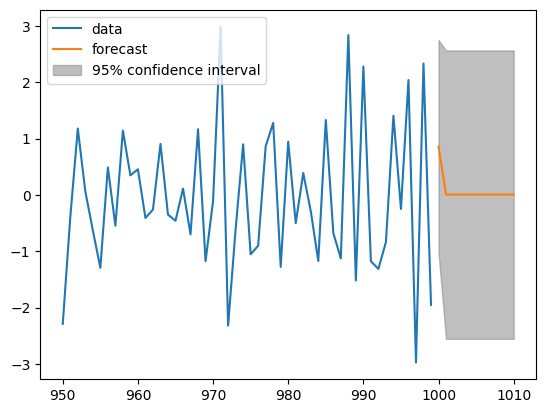

'\nNotice that the out-of-sample forecasts are flat into the future after the first data point.\n'

In [15]:
# exercise 04

"""
Forecasting with MA Model

As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using the plot_predict() function in statsmodels.

For the simulated series simulated_data_1 with 'theta' = -0.9, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.
"""

# Instructions

"""


    Import the class ARIMA and also import the function plot_predict

    Create an instance of the ARIMA class called mod using the simulated data simulated_data_1 and the (p,d,q) order of the model (in this case, for an MA(1)), order=(0,0,1)

    Fit the model mod using the method .fit() and save it in a results object called res

    Plot the in-sample data starting with data point 950

    Plot out-of-sample forecasts of the data and confidence intervals using the plot_predict() function, starting with data point 950 and ending the forecast at point 1010

"""

# solution

# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first MA(1) model
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

#----------------------------------#

# Conclusion

"""
Notice that the out-of-sample forecasts are flat into the future after the first data point.
"""

In [17]:
intraday = pd.read_csv(path_data+'Sprint_Intraday.txt', header=None,usecols=[0,1])
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [18]:
# exercise 05

"""
High Frequency Stock Prices

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the DATE column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

The source of the minute data is Google Finance (see here on how the data was downloaded).
(https://www.quantshare.com/sa-426-6-ways-to-download-free-intraday-and-tick-data-for-the-us-stock-market)

The datetime module has already been imported for you.
"""

# Instructions

"""

    Manually change the first date to zero using .iloc[0,0].
    Change the two column headers to 'DATE' and 'CLOSE' by setting intraday.columns equal to a list containing those two strings.
    Use the pandas attribute .dtypes (no parentheses) to see what type of data are in each column.
    Convert the 'DATE' column to numeric using the pandas function to_numeric().
    Make the 'DATE' column the new index of intraday by using the pandas method .set_index(), which will take the string 'DATE' as its argument (not the entire column, just the name of the column).

"""

# solution

# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

#----------------------------------#

# Conclusion

"""
Good job getting the data in a format that we can work with.
"""

DATE      object
CLOSE    float64
dtype: object


'\nGood job getting the data in a format that we can work with.\n'

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389
Missing rows:  {182, 14}


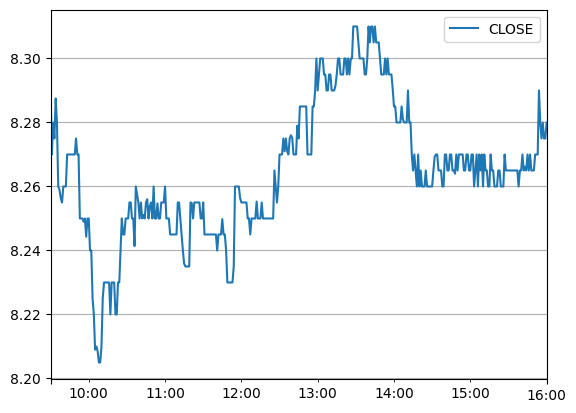

'\nMissing data is common with high frequency financial time series, so good job fixing that.\n'

In [19]:
# exercise 06

"""
More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".
"""

# Instructions

"""

    Print out the length of intraday using len().
---

    Find the missing rows by making range(391) into a set and then subtracting the set of the intraday index, intraday.index.
---

    Fill in the missing rows using the .reindex() method, setting the index equal to the full range(391) and forward filling the missing data by setting the method argument to 'ffill'.
---

    Change the index to times using pandas function date_range(), starting with '2017-09-01 9:30' and ending with '2017-09-01 16:00' and passing the argument freq='1min'.
    Plot the data and include gridlines.

"""

# solution

# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

#----------------------------------#

# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

#----------------------------------#

# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

#----------------------------------#

# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

#----------------------------------#

# Conclusion

"""
Missing data is common with high frequency financial time series, so good job fixing that.
"""

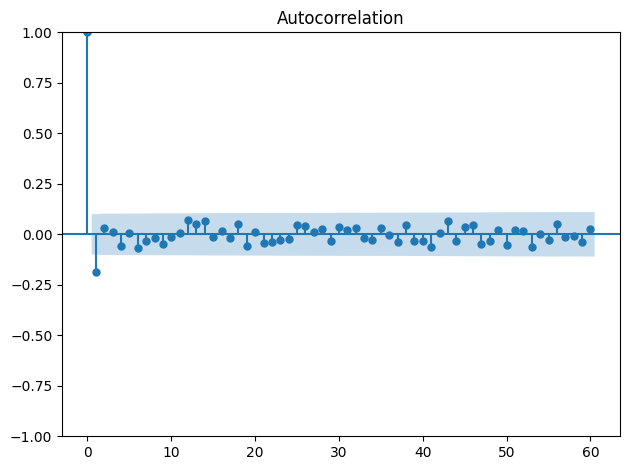

-0.171716193948006


/tmp/ipykernel_109611/1433040358.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(res.params[1])


'\nNotice the significant negative lag-1 autocorrelation, just like for an MA(1) model.\n'

In [21]:
# exercise 07

"""
Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.
"""

# Instructions

"""

    Import plot_acf and ARIMA modules from statsmodels
    Compute minute-to-minute returns from prices:
        Compute returns with the .pct_change() method
        Use the pandas method .dropna() to drop the first row of returns, which is NaN
    Plot the ACF function with lags up to 60 minutes
    Fit the returns data to an MA(1) model and print out the MA(1) parameter

"""

# solution

# Import plot_acf and ARIMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.tight_layout()
plt.show()

# Fit the data to an MA(1) model
mod = ARIMA(returns, order=(0,0,1))
res = mod.fit()
print(res.params[1])

#----------------------------------#

# Conclusion

"""
Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.
"""

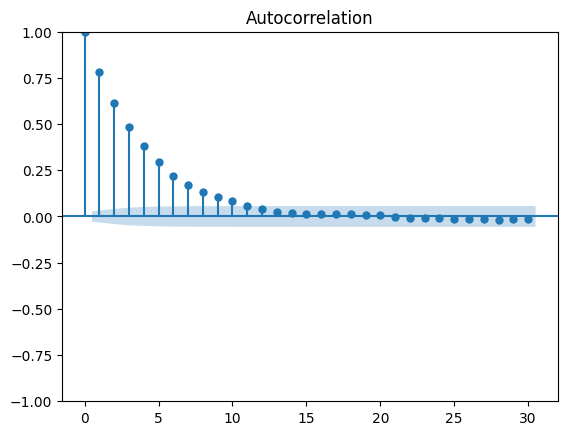

'\nNotice that the ACF looks the same as an AR(1) with parameter 0.8.\n'

In [22]:
# exercise 08

"""
Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA('inf') model with the appropriate parameters.

You will simulate an MA model with parameters 0.8,0.8²,0.8³,... for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with 'theta' = 0.8.

Note, to raise a number x to the power of an exponent n, use the format x**n.
"""

# Instructions

"""
Import the modules for simulating data and plotting the ACF from statsmodels
Use a list comprehension to build a list with exponentially decaying MA parameters: 1, 0.8, 0.8², 0.8³
Simulate 5000 observations of the MA(30) model
Plot the ACF of the simulated series
"""

# solution

# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

#----------------------------------#

# Conclusion

"""
Notice that the ACF looks the same as an AR(1) with parameter 0.8.
"""